<a href="https://colab.research.google.com/github/nell78/Stock_Price_Prediction/blob/main/exercise/Stock_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# (라이브러리 설치 후 런타임 재시작 필요)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123623 files and direc

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
# Matplotlib 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [4]:
pip install -U finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 kB 5.3 MB/s eta 0:00:00


In [10]:
import FinanceDataReader as fdr
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# 오늘 날짜와 10년 전 날짜 계산
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now().replace(year=datetime.now().year - 10)).strftime('%Y-%m-%d')

# AAPL 주가 데이터 수집
data = fdr.DataReader('AAPL', start_date, end_date)
data['Date'] = data.index  # 인덱스 열을 Date 열로 추가

# 종가 데이터만 추출
closing_prices = data['Close']

# 출력 확인
print(closing_prices)

2014-10-31     27.000000
2014-11-03     27.350000
2014-11-04     27.150000
2014-11-05     27.215000
2014-11-06     27.174999
                 ...    
2024-10-24    230.570007
2024-10-25    231.410004
2024-10-28    233.399994
2024-10-29    233.669998
2024-10-30    230.100006
Name: Close, Length: 2516, dtype: float64


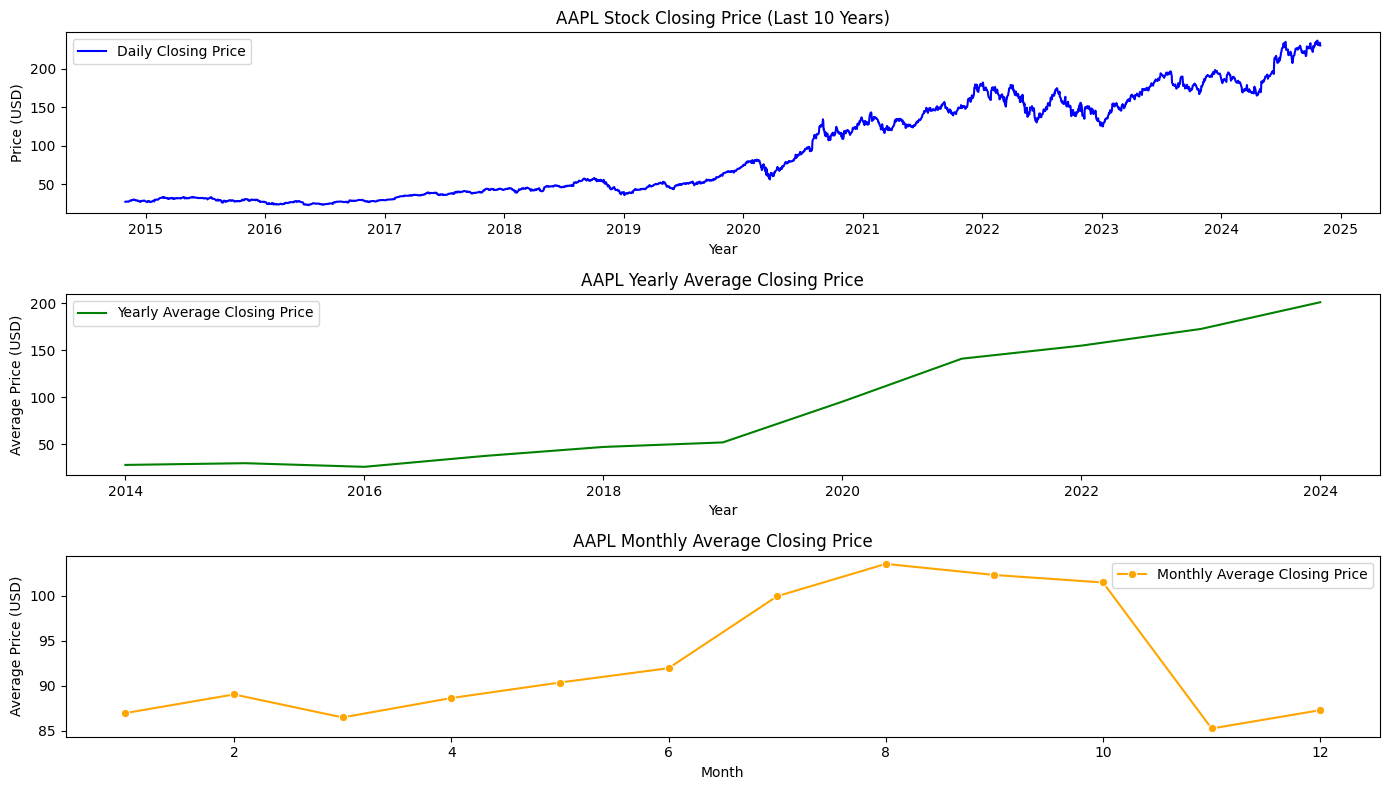

In [14]:
# 시각화
plt.figure(figsize=(14, 8))

# 1. 전체 종가 시계열 그래프 (트렌드 관찰)
plt.subplot(3, 1, 1)
plt.plot(data['Date'], data['Close'], label='Daily Closing Price', color='blue')
plt.title("AAPL Stock Closing Price (Last 10 Years)")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.legend(loc="best")

# 2. 연도별 평균 종가 그래프 (연간 트렌드)
data['Year'] = data['Date'].dt.year
yearly_avg = data.groupby('Year')['Close'].mean()
plt.subplot(3, 1, 2)
plt.plot(yearly_avg.index, yearly_avg.values, label='Yearly Average Closing Price', color='green')
plt.title("AAPL Yearly Average Closing Price")
plt.xlabel("Year")
plt.ylabel("Average Price (USD)")
plt.legend(loc="best")

# 3. 월별 평균 종가 그래프 (계절성 확인)
data['Month'] = data['Date'].dt.month
monthly_avg = data.groupby('Month')['Close'].mean()
plt.subplot(3, 1, 3)
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o', label='Monthly Average Closing Price', color='orange')
plt.title("AAPL Monthly Average Closing Price")
plt.xlabel("Month")
plt.ylabel("Average Price (USD)")
plt.legend(loc="best")

plt.tight_layout()
plt.show()